# E-Commerce Analytics 

As the company's data analyst, I first have to outline and understand our business we provide as well as our goals.

We are an E-commerce organisation that provides a platform for customers to buy and sell various products online. Our main aims are to reduce friction in the retail industry, in terms of delivery as well as transaction speed, branch out into several countries as the internet is globally accessible, as well as collecting data to better target customers' future purchases. 

Now that our aims have been acknowledged, I have received 3 CSV files to be analysed and will first open the order_data.csv file. 

In [42]:
#importing pandas libary
import pandas as pd

#importing first csv file
data = pd.read_csv('/Users/aidanazmy/Downloads/order_data.csv', index_col = 0) 

#displaying first and last 5 rows 
display(data.head())
display(data.tail())

#displaying dimensions
display(data.shape)


,order_status,order_list,total_price,order_paid,day,time
id,,,,,,
33,7,"""{\""order\"":[{\""product_id\"":29,\""quantity\"":1...",16.0,0,Tue,14:55:58
40,7,"""{\""order\"":[{\""product_id\"":31,\""quantity\"":1...",160.0,0,Tue,15:11:09
43,7,"""{\""order\"":[{\""product_id\"":33,\""quantity\"":1...",50.0,0,Tue,15:17:58
47,4,"""{\""order\"":[{\""product_id\"":34,\""quantity\"":1...",550.0,0,Tue,15:53:37
49,8,"""{\""order\"":[{\""product_id\"":35,\""quantity\"":2...",6.0,0,Tue,16:04:50


,order_status,order_list,total_price,order_paid,day,time
id,,,,,,
652,4,"{""order"": [{""unit"": ""Unit"", ""photo"": ""1514-160...",17.9,0,Fri,21:04:31
653,11,"{""order"": [{""unit"": ""Pek"", ""photo"": ""868-16096...",0.0,1,Sat,23:49:16
654,11,"{""order"": [{""unit"": ""Pek"", ""photo"": ""868-16096...",54.5,1,Sat,23:54:24
655,4,"{""order"": [{""unit"": ""Pek"", ""photo"": ""354-16076...",8.0,0,Sun,17:11:06
656,4,"{""order"": [{""unit"": ""Unit"", ""photo"": ""3853-160...",20.0,0,Sun,17:13:02


(565, 6)

The CSV file is comprised of columns stating the order ID, status, list, total price, paid or not paid, as well as the date and time. 

Next I will showcase the second CSV file product_category.csv.

In [4]:
#importing pandas 
import pandas as pd

#importing first csv file
status = pd.read_csv('/Users/aidanazmy/Downloads/order_status.csv', index_col = 0) 

#displaying columns
display(status)

#displaying dimensions
display(status.shape)

""
order_status_id status
1\tMenunggu Pengesahan Peniaga
2\tPesanan diterima
3\tPesanan ditolak
4\tPesanan dibatalkan
5\tPesanan sedang disediakan
6\tPesanan sudah siap dan boleh diambil
7\tPesanan sudah siap dan dalam perjalanan
8\tSahkan kod kepada pelanggan
9\tMenunggu pengesahan kod


(11, 0)

From this data we can see that there are 11 order statuses that we process. 

For the first step of the analysis, I want to find out how many orders have been paid or not, to see if there is any friction in the transaction process. For context, 0 is unpaid and 1 is paid.

In [61]:
#extracing order_paid column
paid = data['order_paid'].value_counts(sort=True)
print(paid)

0    300
1    265
Name: order_paid, dtype: int64


As you can see, 300 of our orders have yet to be paid which makes up 53% of the total orders. 

There is apparent friction and delay to payments, so we can look into our payment methods and ensure we use a method that pays up front and fast, not for a long period of installments as this will make sellers unhappy. 

Putting the findings in a graph:

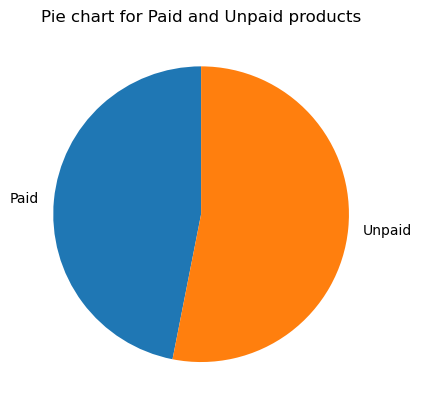

In [32]:
#importing matplotlib
import matplotlib.pyplot as plt

#setting the frequency
freq = [265,300]

#setting labels and title
mylabels = ['Paid','Unpaid']   
plt.title('Pie chart for Paid and Unpaid products')

#plotting pie chart
plt.pie(freq, labels = mylabels, startangle = 90)
plt.show()

Next, I want to analyse which days are our customers spending the money on the most, and how many of them are paid or unpaid.

In [4]:
#importing pandas as pd
import pandas as pd

#opening up first csv file
data = pd.read_csv('/Users/aidanazmy/Downloads/order_data.csv', index_col = 0) 

#obtaining frequency of days 
days = data['day'].value_counts(sort=True)
print(days)

Fri    121
Thu     90
Wed     84
Sat     76
Sun     68
Mon     65
Tue     61
Name: day, dtype: int64


From the data, we can see that customers frequently purchase on Friday, Thursday and Wednesday, towards the weekend. 

If we put this data in a bar chart to easily visualise:

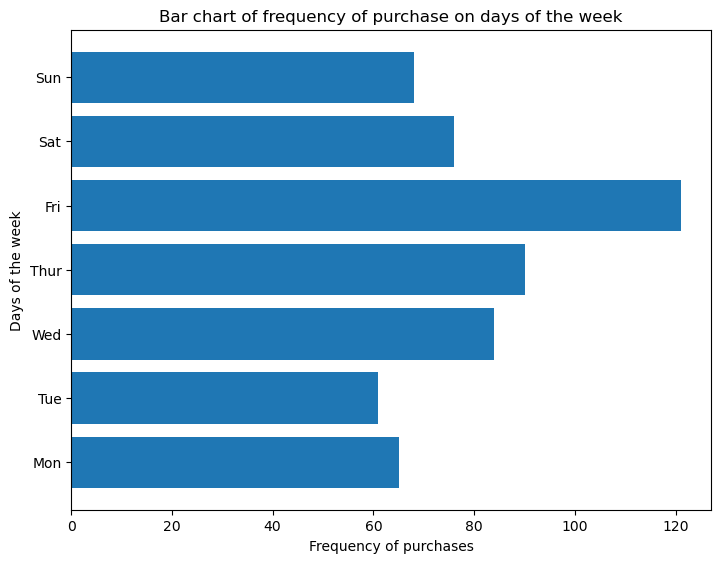

In [146]:
#importing matplotlib
import matplotlib.pyplot as plt

#forming bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#setting variables
x = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
y = [65, 61, 84, 90, 121, 76, 68]

#plotting axes, adding title and axes label
ax.barh(x,y)
plt.title('Bar chart of frequency of purchase on days of the week')
plt.ylabel('Days of the week')
plt.xlabel('Frequency of purchases')

plt.show()

Now, with the bar chart we can clearly there are lower purchases at the start of the week and a sudden spike as the weekend approaches. 

To combat this, we could try and push for more advertisements on Saturday and Sunday, so that people will see it and have time to think about purchasing, which could end up in a purchase days after that, on Monday and Tuesday. Other methods could be put in place, but I feel executing that could boost orders on our weaker days to go along with our success on Wednesdays, Thursdays and Fridays.

However, to get an even more detailed view, let's look at the same bar chart coupled with the paid statuses of all orders on all days of the week.

In [27]:
#Counting how many orders have been either paid or unpaid on each day
data.value_counts(['order_paid', 'day'])

order_paid  day
0           Fri    70
1           Fri    51
0           Thu    50
1           Sat    46
0           Wed    45
1           Thu    40
0           Mon    39
1           Wed    39
            Sun    35
0           Sun    33
            Tue    33
            Sat    30
1           Tue    28
            Mon    26
dtype: int64

From this data, if we merge it with the bar chart previously modelled :

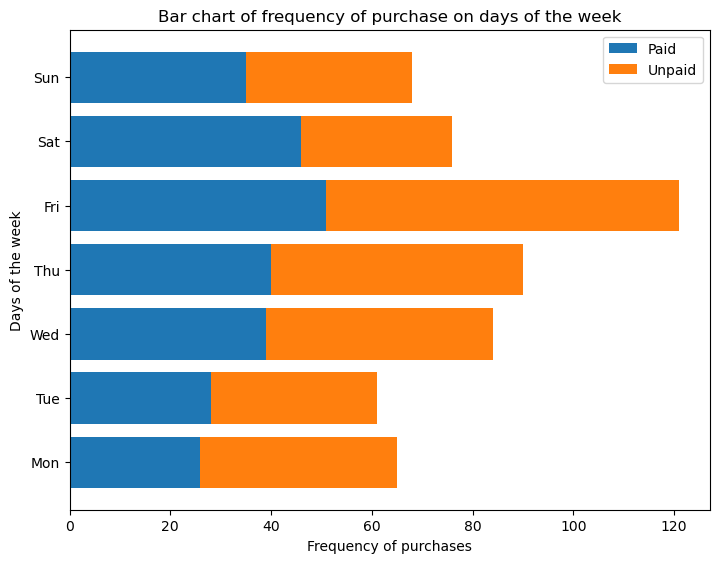

In [154]:
#importing numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

#forming bar chart
N = 7
p = (26, 28, 39, 40, 51, 46, 35)
u = (39, 33, 45, 50, 70, 30, 33)
ind = np.arange(N) 

#setting variables
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#plotting axes, adding title and axes label
ax.barh(ind, p)
ax.barh(ind, u, left = p)

plt.yticks(ind, ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.title('Bar chart of frequency of purchase on days of the week')
plt.ylabel('Days of the week')
plt.xlabel('Frequency of purchases')
plt.legend(labels = ['Paid', 'Unpaid'])

plt.show()

Now with the additional data, we can see that even though we receive most purchases on Friday, a lot of them are yet to be paid. This could be for a multitude of reasons however a main reason could be heavy traffic on our website on the day.

To solve this, we could have the help of our software engineers to monitor the website on days of heavy traffic which could include Wednesday, Thursday and Friday, to help with any delays and ensure no crashes or failures occur.

The final piece of analysis is to look into the products we have on our website and their categories. We will look at how to improve sales with which categories are currently present.

First, I will open the final CSV file to look at our category of products.

In [131]:
#importing first csv file
product = pd.read_csv('/Users/aidanazmy/Downloads/product_category.csv', index_col = 0) 

#displaying first and last 5 rows 
display(product.head())
display(product.tail())

#displaying dimensions
display(product.shape)

,product_category
product_id,
25,Lain-lain
27,Makanan
28,Makanan
29,Makanan
30,Makanan


,product_category
product_id,
9641,Kelengkapan sukan
9642,Pakaian
9643,Makanan
9644,Makanan
9645,Kelengkapan sukan


(9339, 1)

From this, we can deduce that we have 9339 different products on offer, with multiple categories. 

I will now be sorting them into each category to find out how many products we have in their respective categories. 

In [57]:
#extracting product_category column
cat = product['product_category'].value_counts(sort=True)
print(cat)

Makanan                      5754
Lain-lain                    1434
Pakaian                       508
Makanan Kering                464
Bahan Mentah                  341
Kecantikan & Kesihatan        334
Aksesori perhiasan            136
Perkhidmatan                  117
Kelengkapan rumah              76
Eletrik & Elektronik           48
Buku & Alatan Tulis            28
Produk haiwan peliharaan       25
Automobil                      23
Freelance (Ambil Upah)         20
Barangan Bayi & Permainan      19
Kelengkapan sukan              12
Name: product_category, dtype: int64


With the data at hand, putting them in a bar chart should give us a great idea on which categories are lacking in comparison to others. The obvious outliers are 'Makanan' and 'Lain-Lain' at 5754 and 1434 products respectively, so those will not be included in the chart.

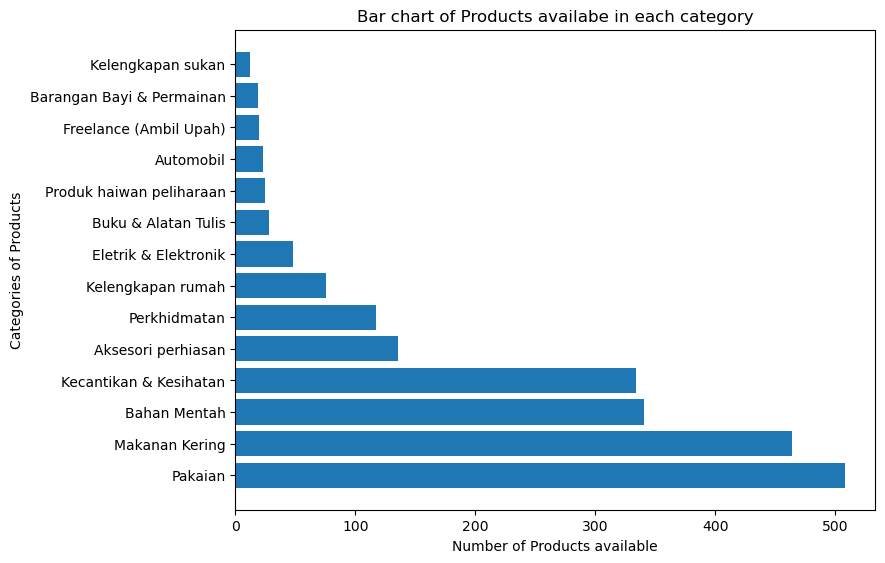

In [3]:
#importing matplotlib
import matplotlib.pyplot as plt

#forming bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#setting variables
x = ['Pakaian',
    'Makanan Kering',
    'Bahan Mentah',
    'Kecantikan & Kesihatan',
    'Aksesori perhiasan',            
    'Perkhidmatan',
    'Kelengkapan rumah',
    'Eletrik & Elektronik',
    'Buku & Alatan Tulis',         
    'Produk haiwan peliharaan',
    'Automobil',
    'Freelance (Ambil Upah)',
    'Barangan Bayi & Permainan',
    'Kelengkapan sukan']   
y = [508,464,341,334,136,117,76,48,28,25,23,20,19,12]

#plotting axes, adding title and axes label
ax.barh(x,y)
plt.title('Bar chart of Products availabe in each category')
plt.ylabel('Categories of Products')
plt.xlabel('Number of Products available')

plt.show()

Now with this final piece of data displayed in the bar chart, we can evidently see a harsh difference of products available between categories like 'Kelengkapan Sukan' and 'Barangan Bayi & Permainan' when compared to 'Pakaian' or 'Makanan Kering'.

With baby products proving important and the fitness industry growing, we should capitalise on this and increase the products sold in these categories. I suggest we contact and constantly search for suppliers and sellers in these respective industries so we have a higher chance of securing more customers from different target audiences, like pregnant women as an example, to use our website and generate more sales.